In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
dataset = pd.read_csv('Dataset/breast_cancer.csv')

In [21]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [22]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [23]:
print(X)

[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]


In [24]:
print(y)

[2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2
 4 4 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4 4 2
 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2 4 4
 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 4 2 4
 4 2 2 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4 2 4 4 4 2 4
 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 4 4 4 2 4 4
 2 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 4 2 4 4 4 2 2 2 2 4 4 4 4 4 2 4
 4 4 2 4 2 4 4 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2
 4 2 2 2 4 2 2 4 4 2 2 4 2 4 2 2 4 2 4 4 4 2 2 4 4 2 4 2 2 4 4 2 2 2 4 2 2
 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2
 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2 4
 2 2 2 4 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 4 2 4 4 4 2
 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 4 2 2 2 4 4 4 2 4 2 4 2 2
 2 2 2 2 2 2 2 2 2 2 4 2 

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
# training the logistic regression model for the training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [34]:
# predicting the test set results
y_pred = classifier.predict(X_test)

In [35]:
# accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.9562043795620438


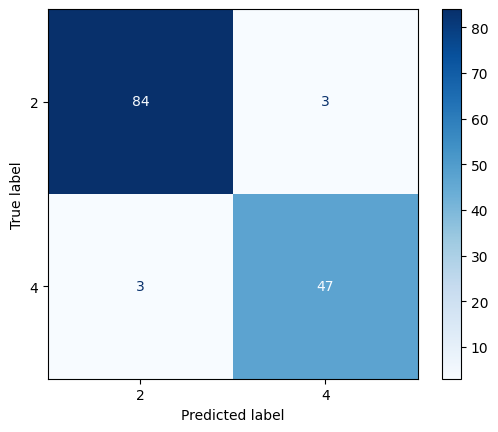

In [36]:
# making the confusion matrix
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)

In [43]:
# computing the accuracy with k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X = X_train, y = y_train, cv=10)

print('Accuracy: {:.2f}'.format(accuracies.mean()))
print('Std: {:.2f}'.format(accuracies.std()))


Accuracy: 0.97
Std: 0.02
